In [1]:
import pandas as pd
import os
import glob
from spectrum import Periodogram, data_cosine
import matplotlib.pyplot as plt
import numpy as np
  

In [2]:
# Get CSV files list from a folder
path = 'f:/GAC_KSY/spectrum/1_amaranth/data/NIR_Gachon_amaranth'
mat_files = glob.glob(path + "/*.xlsx")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_excel(file) for file in mat_files)

# Concatenate all DataFrames
df   = pd.concat(df_list, ignore_index=True)

In [1]:
df_list = [pd.read_excel(file) for file in mat_files]
df_list[1]


NameError: name 'mat_files' is not defined

In [6]:
df.columns

Index(['Cm-1', 'E46_res32_001_230428_104059.0000',
       'E46_res32_001_230428_104059.0001', 'E46_res32_001_230428_104059.0002',
       'E47_res32_001_230428_105353.0000', 'E47_res32_001_230428_105353.0001',
       'E47_res32_001_230428_105353.0002', 'O46_res32_001_230428_103400.0000',
       'O46_res32_001_230428_103400.0001', 'O46_res32_001_230428_103400.0002',
       ...
       'E096_230612_140148.0002', 'E097_230612_105205.0000',
       'E097_230612_105205.0001', 'E097_230612_105205.0002',
       'E098_230612_134546.0000', 'E098_230612_134546.0001',
       'E098_230612_134546.0002', 'E099_230612_102805.0000',
       'E099_230612_102805.0001', 'E099_230612_102805.0002'],
      dtype='object', length=952)

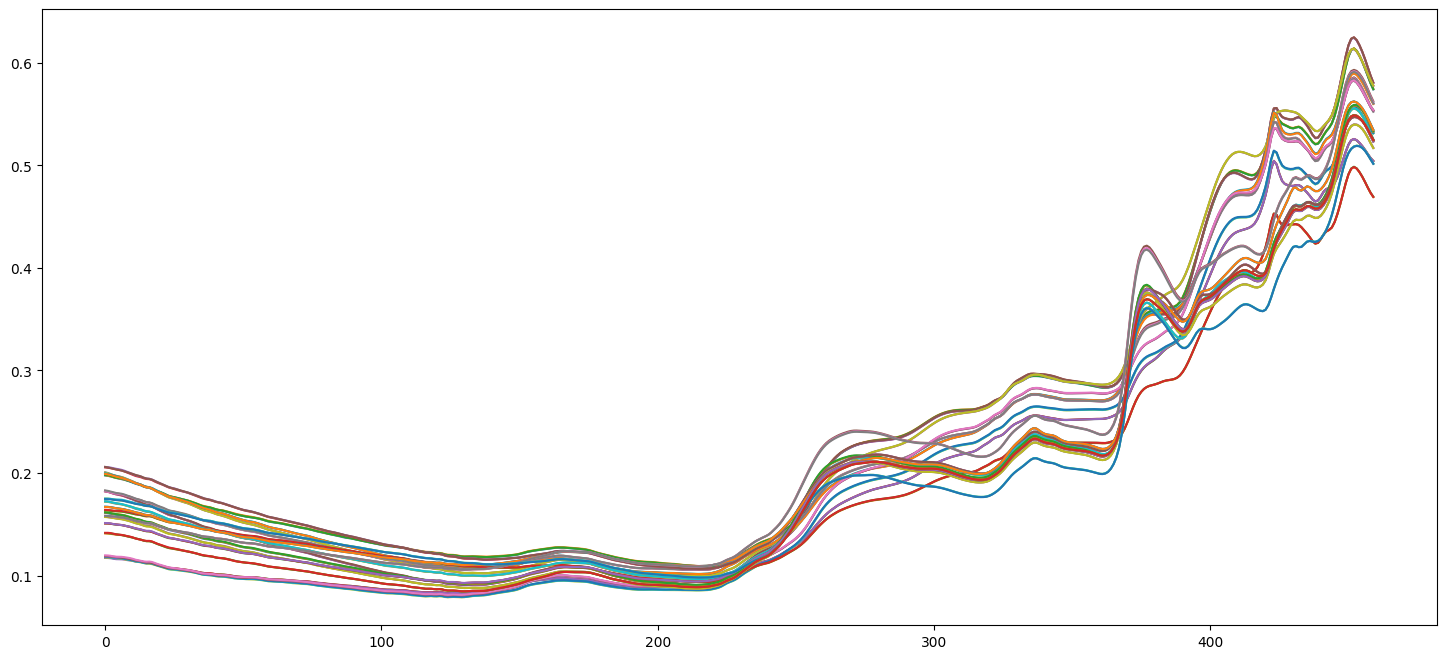

In [5]:
plt.rcParams['figure.figsize'] = [18, 8]
plt.plot(df_list[1].iloc[:,1:])
plt.show()

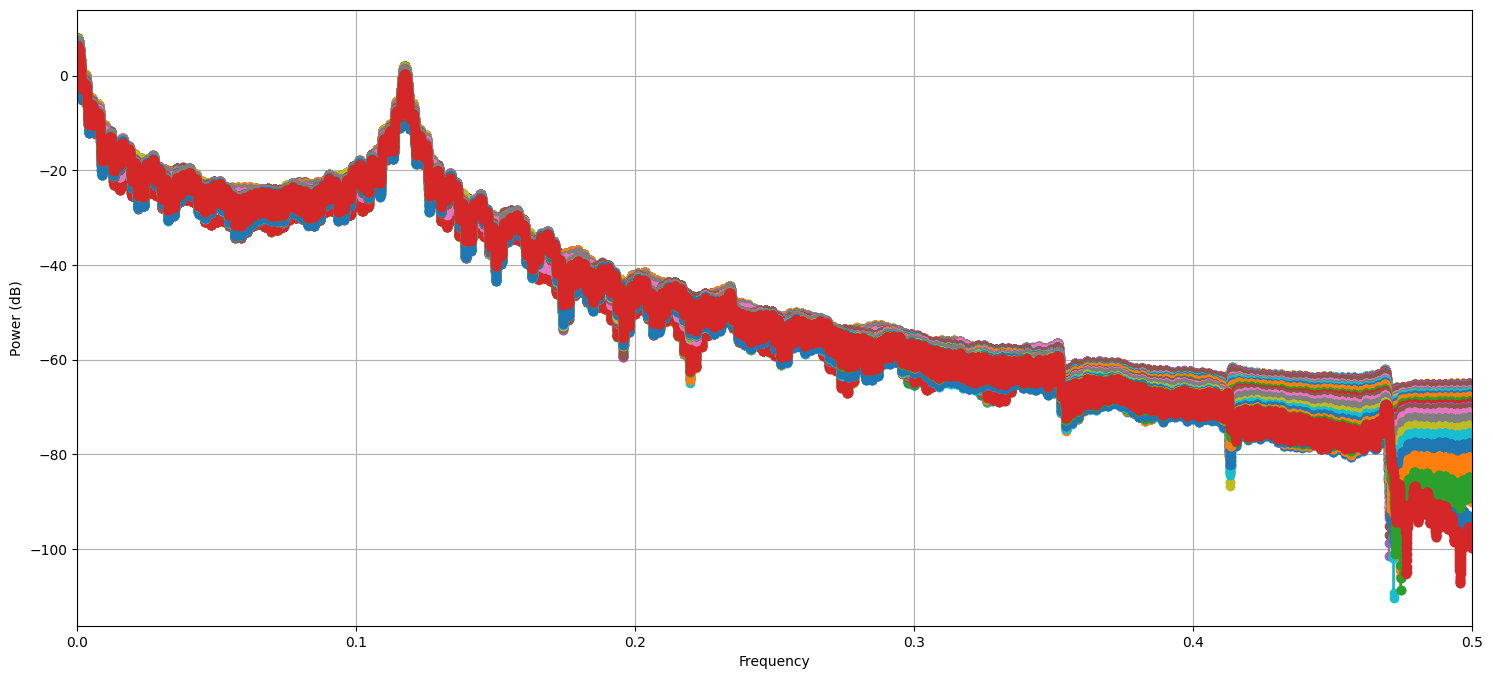

In [47]:
## the Power Spectrum Estimation method provided in spectrum.
## creating an object Periodogram. 
p = Periodogram(df_list[1].iloc[:,1:])
## running the spectrum estimation
p.run() # or p()

p.plot(marker='o')

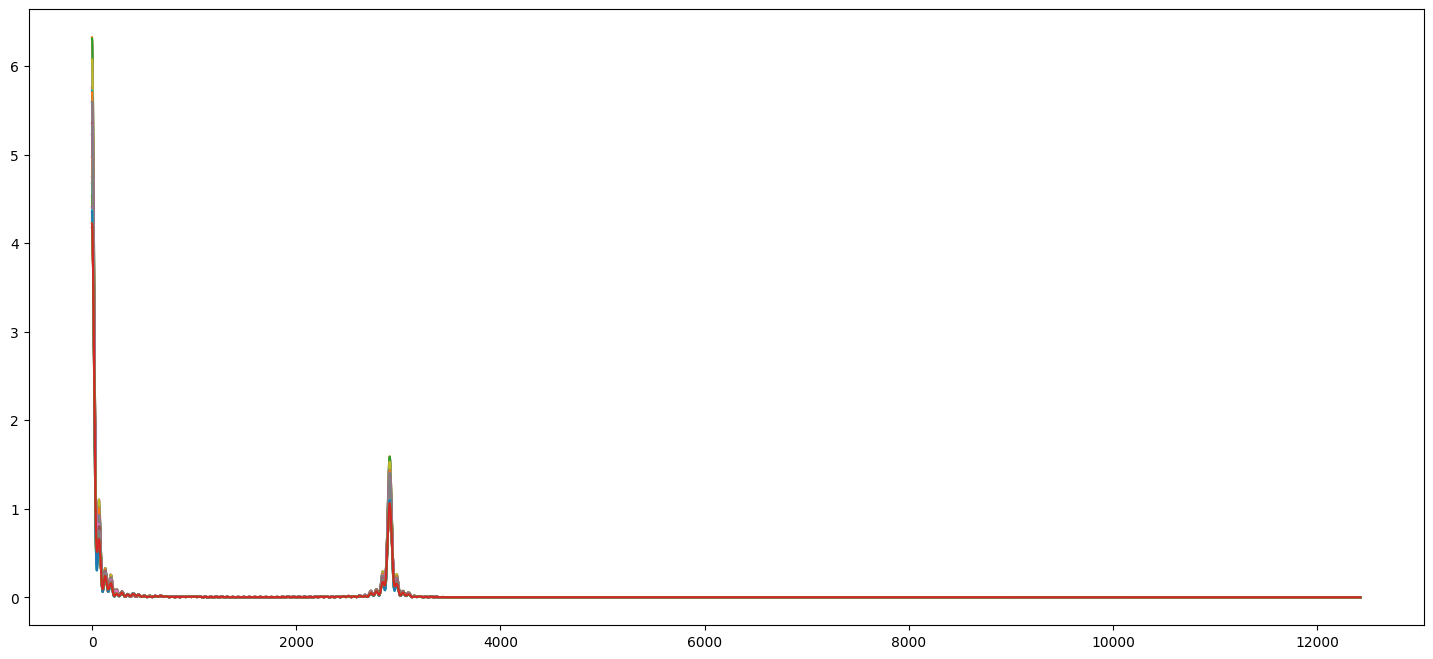

In [50]:
plt.plot(p.psd)
plt.show()

In [ ]:
plt.savefig(".svg")

In [ ]:
from scipy.fftpack import fft, ifft
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
# fc=1000 # frequency of the carrier
# N = 1e3
# fs=10*fc # sampling frequency with oversampling factor=10
# time = np.arange(N) / fs
# x = np.sin(2*np.pi*fc*time) # time domain signal (real number)
# plt.figure()
# plt.plot(time, x)
# plt.xlabel('Time')
# plt.ylabel('Signal amplitude')
# plt.title('Time domain signal amplitude versus time samples')

N1 = 256 # FFT size
X1 = fft(x, N1) # N-point complex DFT, output contains DC at index 0
# calculate frequency bins with FFT
# Power spectral density (PSD) using FFT and absolute squared
df=fs/N1 # frequency resolution
sampleIndex = np.arange(start = 0,stop = N1) # raw index for FFT plot
f=sampleIndex*df # x-axis index converted to frequencies
PSD = abs(X1)**2
n1 = len(f)//2
n2 = len(PSD)//2
plt.figure()
plt.plot(f[1:n1], PSD[1:n2])
plt.xlabel('Frequency indices')
plt.ylabel('Signal power')
plt.title('Frequency domain signal power vs frequency indices')
# Power spectral density (PSD) using signal.welch
f1, Pxx_spec = signal.welch(x, fs, 'flattop', 512, scaling='spectrum')
plt.figure()
plt.semilogy(f1, np.sqrt(Pxx_spec))
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.title('Power spectrum as per scipy.signal.welch function')
plt.show()